<center>
    <h1><bold>Pavan Kumar Mistry --> Assignment-1</bold></h1>
</center>

# My Assigned Breeds
+ Labrador_retriever
+ English_setter
+ standard_poodle
+ miniature_pinscher

## 2a: Cropping and Resize Images in Your 4-class Images Dataset


In [1]:
from PIL import Image
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
import cv2

In [2]:
base_path = os.getcwd()
image_path = os.path.join(base_path, 'images')
annotation_path = os.path.join(base_path, 'Annotation')


def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox


def get_image(annot):
    base_path = os.getcwd()
    image_path = os.path.join(base_path, 'Images')
    image_name = f"{os.path.basename(annot)}.jpg"
    breed_name = os.path.basename(os.path.dirname(annot))
    return os.path.join(image_path, breed_name, image_name)


def crop_and_save_image(image_path, bounding_boxes):
    img = Image.open(image_path)
    total_cropped_and_saved_images = 0

    for idx, box in enumerate(bounding_boxes):
        cropped_image = img.crop(box).resize((128, 128), Image.LANCZOS)

        base_filename = os.path.basename(image_path)
        new_filename = f"{os.path.splitext(base_filename)[0]}_cropped_{idx}{os.path.splitext(base_filename)[1]}"
        cropped_image_path = os.path.join("croppedImages", new_filename)

        Path(cropped_image_path).parent.mkdir(parents=True, exist_ok=True)

        cropped_image.convert('RGB').save(cropped_image_path)
        total_cropped_and_saved_images += 1
    return total_cropped_and_saved_images


def image_process(interested_classes):
    total_saved_images = 0
    annotation_files = [
        os.path.join(annotation_path, interested_class, file_name)
        for interested_class in interested_classes
        for file_name in os.listdir(os.path.join(annotation_path, interested_class))
        if not os.path.isdir(os.path.join(annotation_path, interested_class, file_name))
    ]

    for index, annotation in enumerate(annotation_files, start=1):
        bounding_boxes = get_bounding_boxes(annotation)
        image_file_path = get_image(annotation)

        if not os.path.exists(image_file_path):
            print(f"Image file not found: {image_file_path}")
            continue

        total_saved_images += crop_and_save_image(image_file_path, bounding_boxes)

    print(f"Total cropped and saved images: {total_saved_images}")


In [3]:
interested_classes = [
    'n02099712-Labrador_retriever',
    'n02100735-English_setter',
    'n02113799-standard_poodle',
    'n02107312-miniature_pinscher'
]

image_process(interested_classes)

Total cropped and saved images: 724


## 2b: Image processing
+ i. Choose 2 images from each class
+ ii. Convert the color images to grayscale (must use iteration)
+ iii. Plot the 8 grayscale images with their pixel intensity histograms
+ iv. Using the 8 grayscale images above, perform edge detection using the sobel edge filter
+ v. Plot 8 edge images  https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py

In [4]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
import numpy as np

In [5]:
# Function to get two images from each class
def get_images_from_classes(root_dir, count=2):
    """Getting specific images from the root directory"""
    image_files = [file for file in os.listdir(
        root_dir) if file.endswith(".jpg")]
    return [os.path.join(root_dir, img) for img in image_files[:count]]


def fetch_and_process_images(image_path):
    original_imgs = [io.imread(path) for path in image_path]
    grayscale_imgs = [color.rgb2gray(img) for img in original_imgs]
    edge_imgs = [filters.sobel(img) for img in grayscale_imgs]
    return original_imgs, grayscale_imgs, edge_imgs

def display_image(grayscale_imgs, edge_imgs):
    num_imgs = len(grayscale_imgs)
    fig, axes = plt.subplots(num_imgs, 3, figsize = (15,5 * num_imgs))

    for i in range(num_imgs):
         # Grayscale image
        ax_gray = axes[i, 0] if num_imgs > 1 else axes[0]
        ax_gray.imshow(grayscale_imgs[i], cmap='gray')
        ax_gray.set_title(f"Grayscale Image {i+1}")
        ax_gray.axis('off')

        # Histogram
        ax_hist = axes[i, 1] if num_imgs > 1 else axes[1]
        ax_hist.hist(grayscale_imgs[i].ravel(), bins=256, range=[0, 1], color='orange', alpha=0.7)
        ax_hist.set_title(f"Histogram {i+1}")
        
        # Edge detection result
        ax_edge = axes[i, 2] if num_imgs > 1 else axes[2]
        ax_edge.imshow(edge_imgs[i], cmap='gray')
        ax_edge.set_title(f"Sobel Edge Detection {i+1}")
        ax_edge.axis('off')

    plt.tight_layout()
    plt.show()

In [6]:
# image directories of selected dog breed classes
image_dirs = []

for class_name in interested_classes:
    image_dirs.append("images/" + class_name)

image_dirs

['images/n02099712-Labrador_retriever',
 'images/n02100735-English_setter',
 'images/n02113799-standard_poodle',
 'images/n02107312-miniature_pinscher']

In [7]:
all_images = [
    img for image_dir in image_dirs for img in get_images_from_classes(image_dir)]

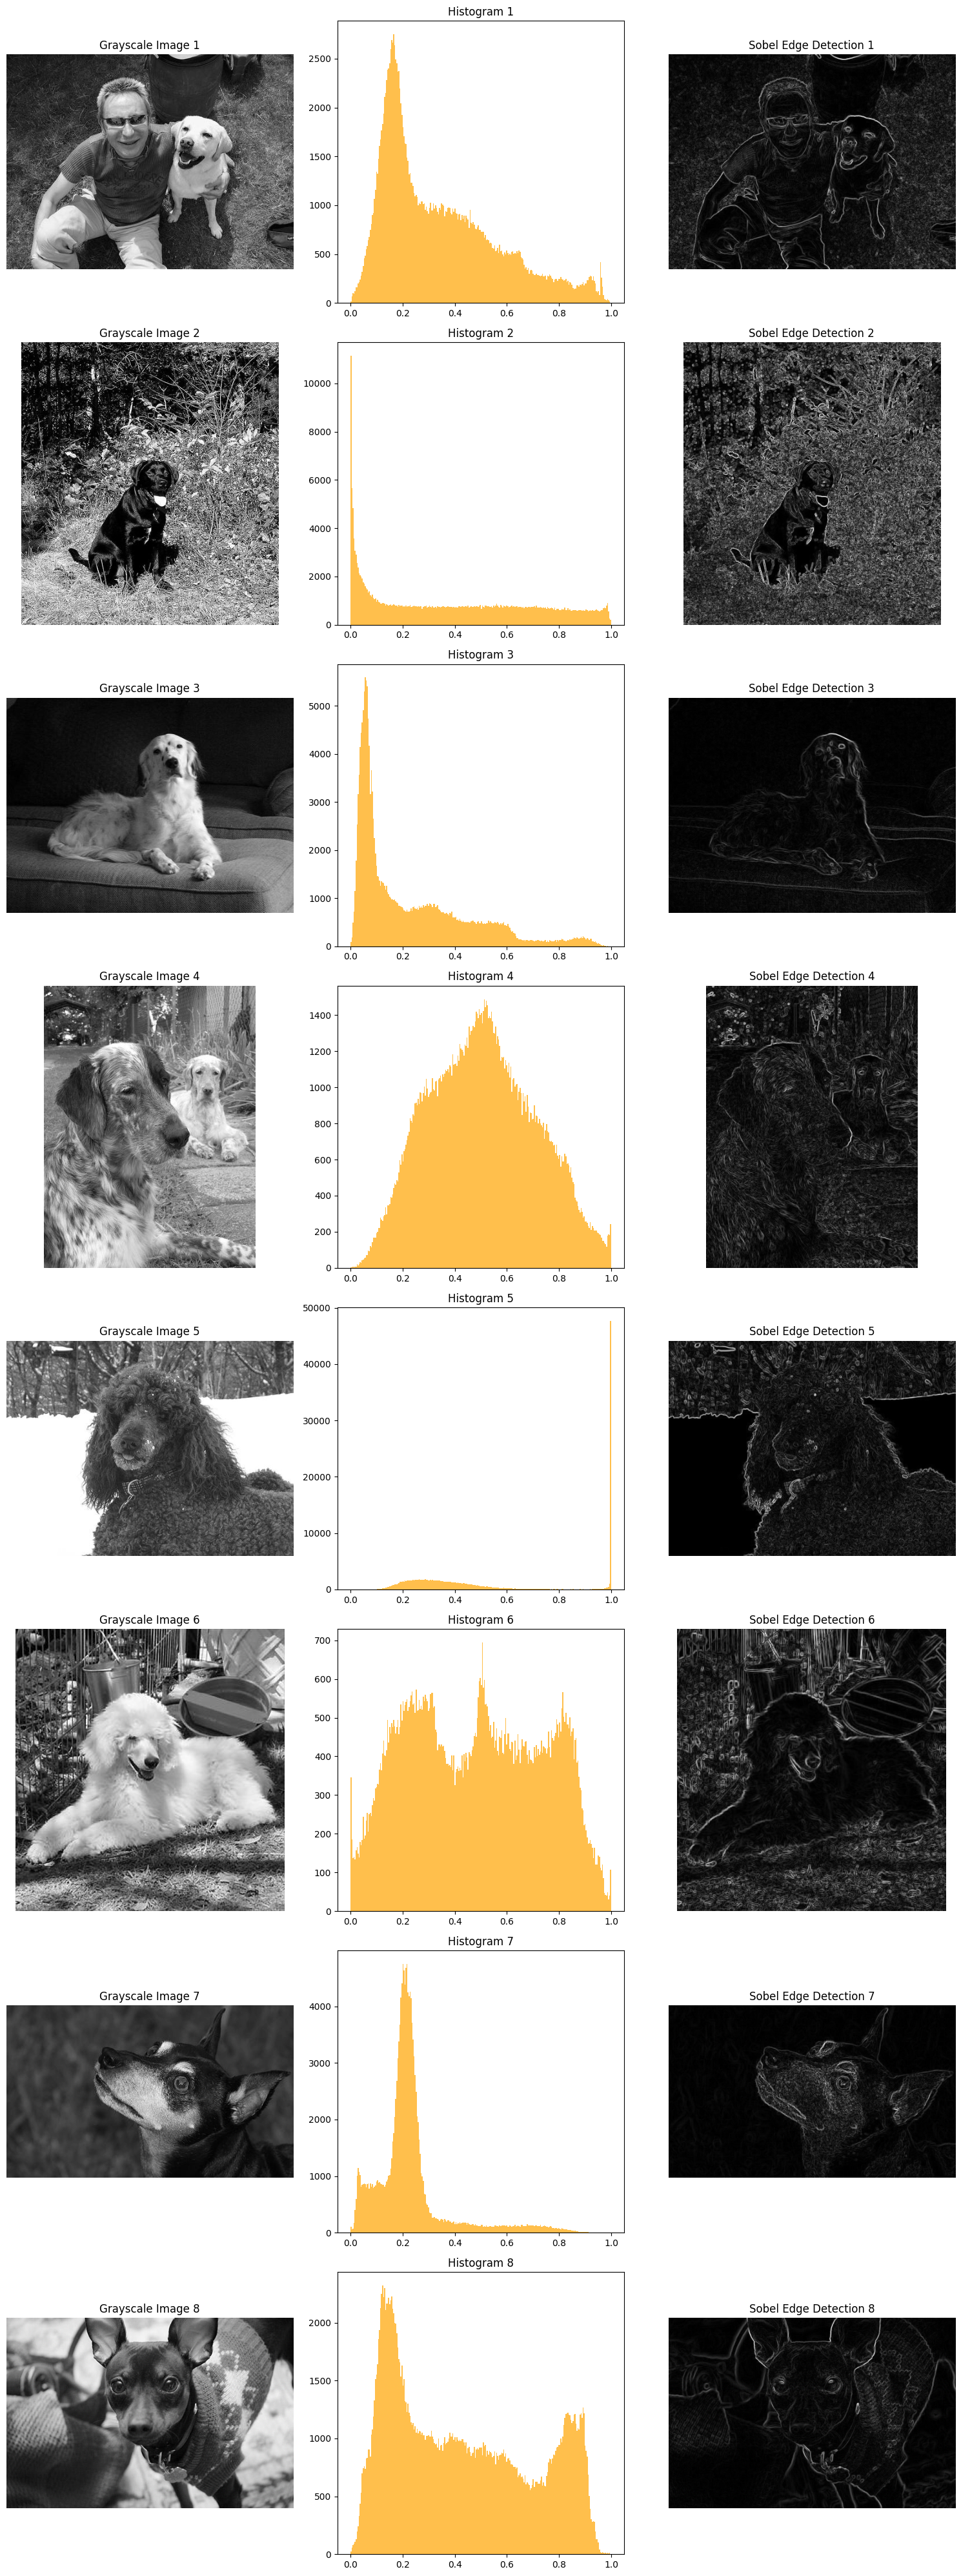

In [8]:
original_imgs, grayscale_imgs, edge_imgs = fetch_and_process_images(all_images)
display_image(grayscale_imgs, edge_imgs)

## 2c Edge histogram

i. Choose 1 image from each class.

ii. Convert the color images to grayscale imag

iii. For each image 𝐼, use the following 
```
import numpy as np
from skimage import filters

def angle(dx,dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

angle_sobel = angle(filetes.sobel_h(I), filters.sobel_v(I)))
```
iv. Use skimage.exposure.histogram obtain a histogram with 36
bins. (1 point)

v. Plot the images with their corresponding edge histogram values (add x-axis label “Bins” and
y-axis label “Pixel Count” ).

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure

In [10]:
base_dir = os.getcwd()
base_dir

'C:\\Users\\pavan\\OneDrive\\Desktop\\MS Docs\\sem-2\\Data Mining\\Assignment\\StanfordDogs'

In [11]:
# select 1 image from each class
def angle(dx, dy):
    return np.mod(np.arctan2(dx, dy), np.pi)


def show_images_and_histogram(list_of_images, base_dir):
    imgs_subdir = os.path.join(base_dir, 'images')

    for category, img_name in list_of_images:
        img_path = os.path.join(imgs_subdir, category, img_name)
        img = io.imread(img_path)

        # covert each image to grayscale
        grayscale_img = color.rgb2gray(img)

        # edge orientation angles
        dx = filters.sobel_h(grayscale_img)
        dy = filters.sobel_v(grayscale_img)
        angle_img = angle(dx, dy)

        # # histogram graph
        hist, hist_centers = exposure.histogram(
            angle_img, nbins=36, source_range='dtype')

        # # showing image
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(grayscale_img, cmap="gray")
        plt.title(f"{category} - {img_name}")
        plt.axis("off")

        # showing histogram
        plt.subplot(1, 2, 2)
        plt.bar(hist_centers, hist, width=0.1, align="center")
        plt.xlabel("Bins")
        plt.ylabel("Pixel Count")
        plt.title("Edge Orientation Histogram")

        plt.tight_layout()
        plt.show()

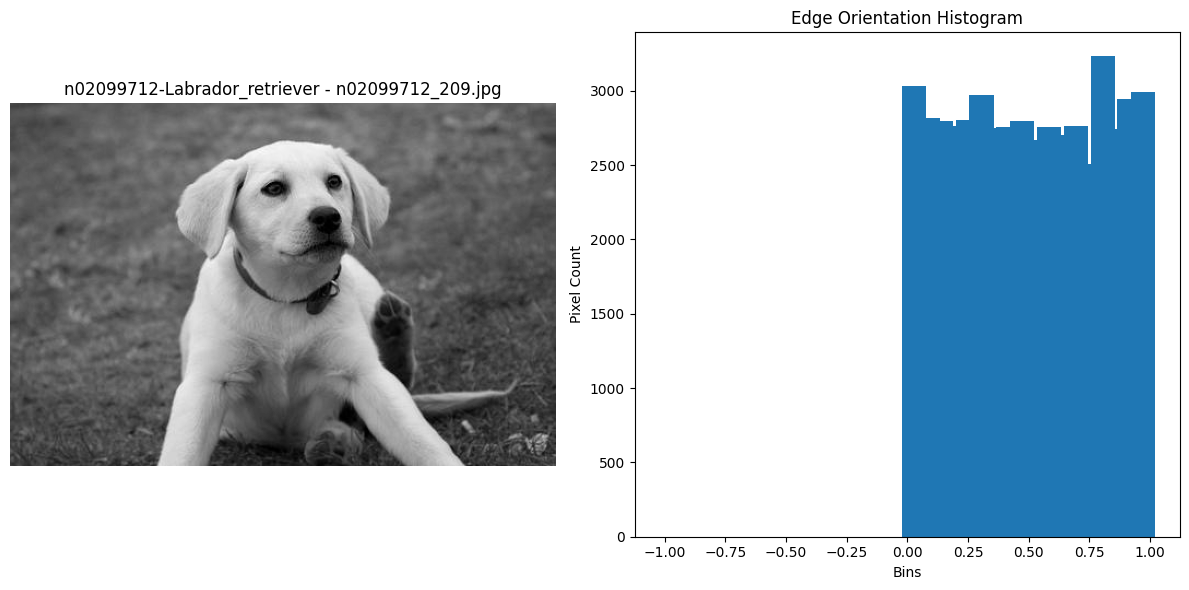

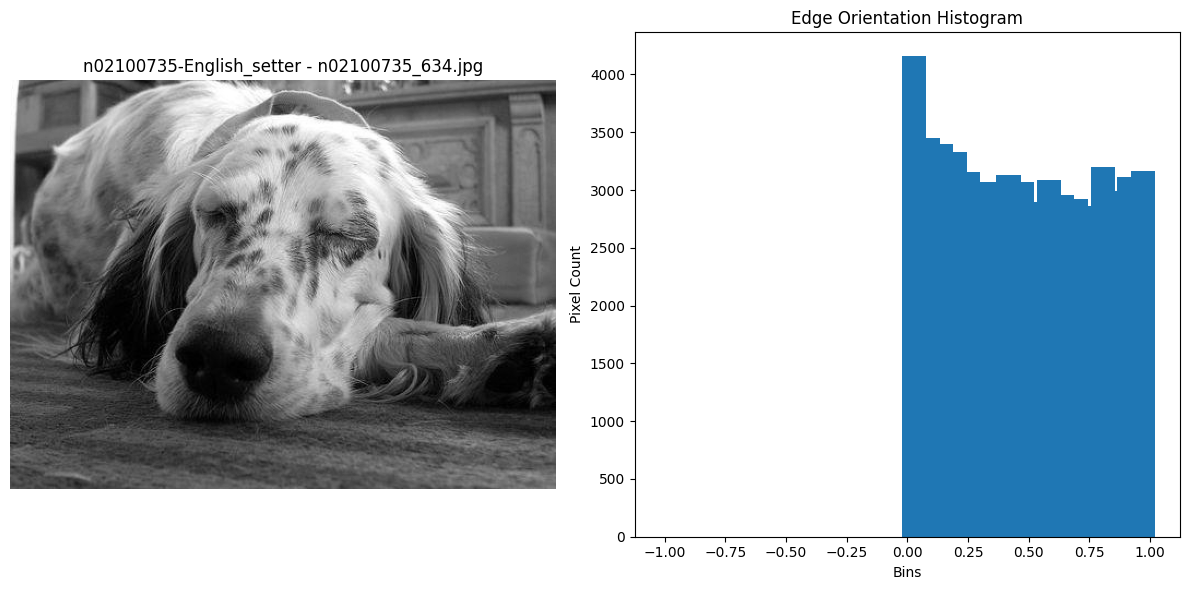

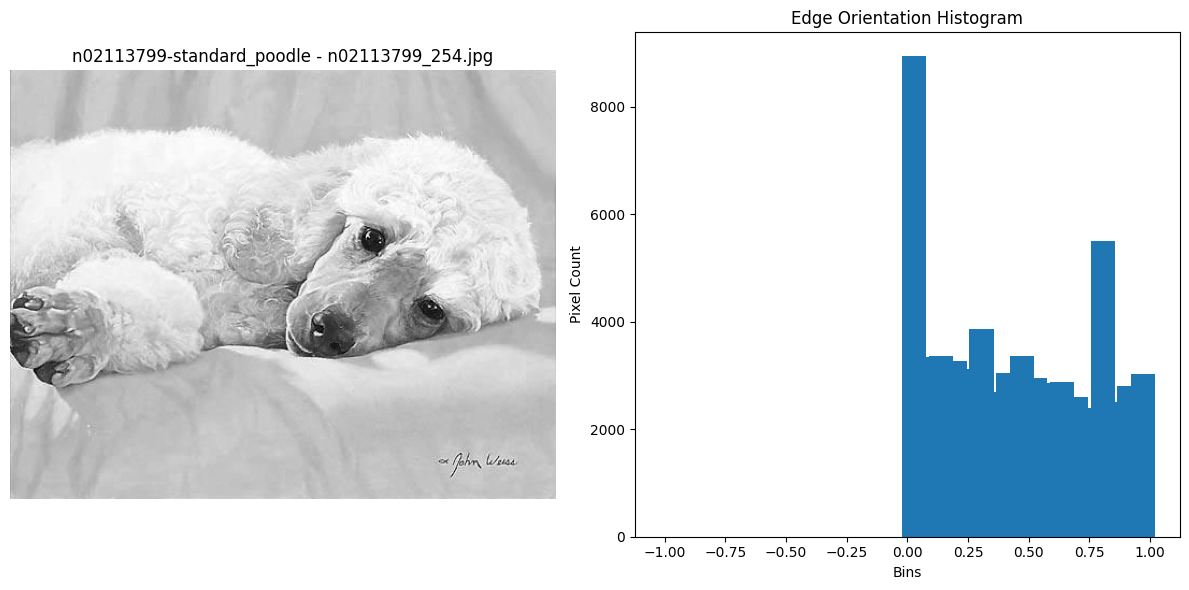

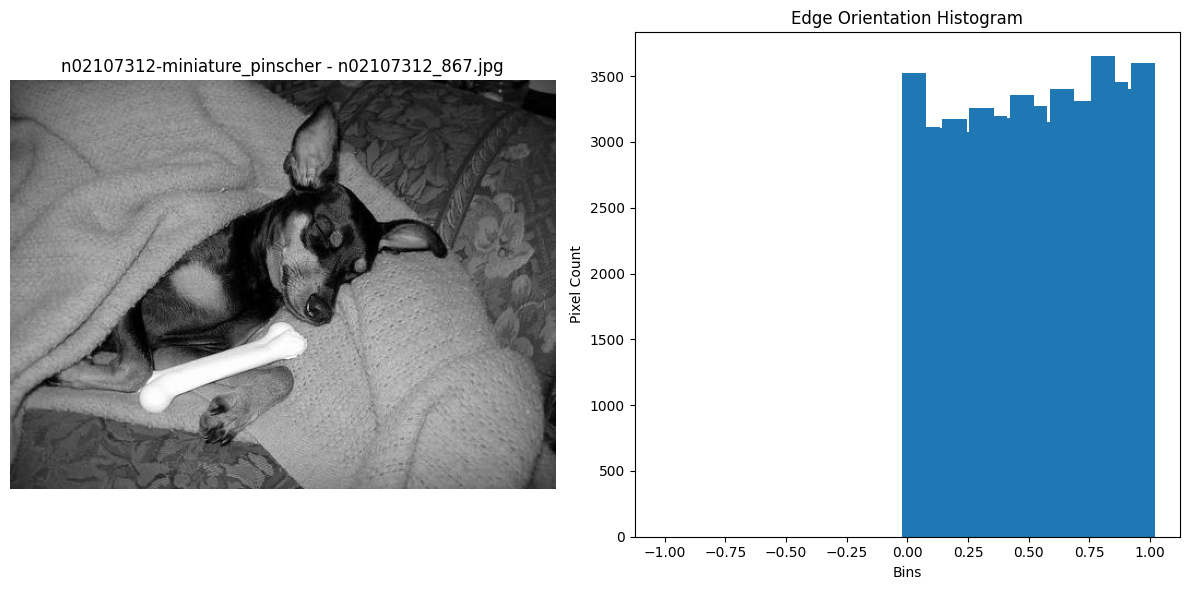

In [12]:
list_of_images = [
    ("n02099712-Labrador_retriever", "n02099712_209.jpg"),
    ("n02100735-English_setter", "n02100735_634.jpg"),
    ("n02113799-standard_poodle", "n02113799_254.jpg"),
    ("n02107312-miniature_pinscher", "n02107312_867.jpg")
]

show_images_and_histogram(list_of_images, base_dir)

## 2d. Histogram Comparison (Measures of Similarity and Dissimilarity)


+ Pick 2 images from the same class and 1 image from another class
+ Convert the three images to edge histograms. (These will be the vector representation of images)
+ Perform histogram comparison using the following metrices/measures
    + Euclidean distance
    + Manhattan distance
    + Cosine distance
 
    + Using the 3 images above, you will compare histogram by computing the metrices/measures of (1) the 2 images from the same class, and (2). 2 images of different classes

In [13]:
import os
import numpy as np
from skimage import io, color, filters, exposure
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

In [14]:
def angle(dx, dy):
    return np.mod(np.arctan2(dx, dy), np.pi)


def generate_edge_histogram(image):
    grayscale_img = color.rgb2gray(image)
    dx = filters.sobel_h(grayscale_img)
    dy = filters.sobel_v(grayscale_img)
    angles = angle(dx, dy)
    hist, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
    return hist


def process_selected_images(base_dir, list_of_images):
    edge_hist = {}
    for category, img_name in list_of_images:
        img_path = os.path.join(base_dir, 'images', category, img_name)
        img = io.imread(img_path)
        hist = generate_edge_histogram(img)
        edge_hist[img_name] = hist
    return edge_hist


def compare_histogram(edge_hist, title):
    histograms = list(edge_hist.values())
    img_names = list(edge_hist.keys())

    euclidean_dist = euclidean_distances(histograms)
    manhattan_dist = manhattan_distances(histograms)
    cosine_dist = cosine_distances(histograms)

    print(title + ":")
    for i in range(len(img_names)):
        for j in range(i + 1, len(img_names)):
            print(f"\nBetween {img_names[i]} and {img_names[j]}:")
            print(f"  Euclidean: {euclidean_dist[i][j]:.4f}")
            print(f"  Manhattan: {manhattan_dist[i][j]:.4f}")
            print(f"  Cosine: {cosine_dist[i][j]:.4f}")

In [15]:
selected_same_class_images = [
    ("n02099712-Labrador_retriever", "n02099712_209.jpg"),
    ("n02099712-Labrador_retriever", "n02099712_1828.jpg"),
]

selected_different_class_images = [
    ("n02099712-Labrador_retriever", "n02099712_209.jpg"),
    ("n02100735-English_setter", "n02100735_634.jpg"),
]

edge_hist1 = process_selected_images(base_dir, selected_same_class_images)
compare_histogram(edge_hist1, "Comparison for images from the same class")

print("\n")

edge_hist2 = process_selected_images(base_dir, selected_different_class_images)
compare_histogram(edge_hist2, "Comparison for images from the different class")

Comparison for images from the same class:

Between n02099712_209.jpg and n02099712_1828.jpg:
  Euclidean: 12011.6031
  Manhattan: 43324.0000
  Cosine: 0.0448


Comparison for images from the different class:

Between n02099712_209.jpg and n02100735_634.jpg:
  Euclidean: 7161.8269
  Manhattan: 22840.0000
  Cosine: 0.0060


## 2e: Histogram of Oriented Gradient (HOG) feature descriptor

+ Pick 1 image and compute its HOG descriptions. Visualize the images and the HOG descriptors from the image
+ https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py

In [16]:
from skimage import io, exposure
from skimage.feature import hog
from skimage.transform import resize
import matplotlib.pyplot as plt

In [17]:
from skimage import io, exposure
from skimage.feature import hog
from skimage.transform import resize
import matplotlib.pyplot as plt

def compute_and_visualize_hog(img_path, category_title, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1)):
    # Load original image
    img = io.imread(img_path)
    
    # HOG features and HOG image
    fd, hog_img = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell,
                        cells_per_block=cells_per_block, visualize=True, channel_axis=-1)
    
    # HOG image for better visualization
    hog_img_rescaled = exposure.rescale_intensity(hog_img, out_range=(0, 255))
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=plt.cm.gray if img.ndim == 2 else None)
    plt.title(f'{category_title} - Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(hog_img_rescaled, cmap='gray')
    plt.title(f'{category_title} - HOG Visualization')
    plt.axis('off')
    
    plt.show()


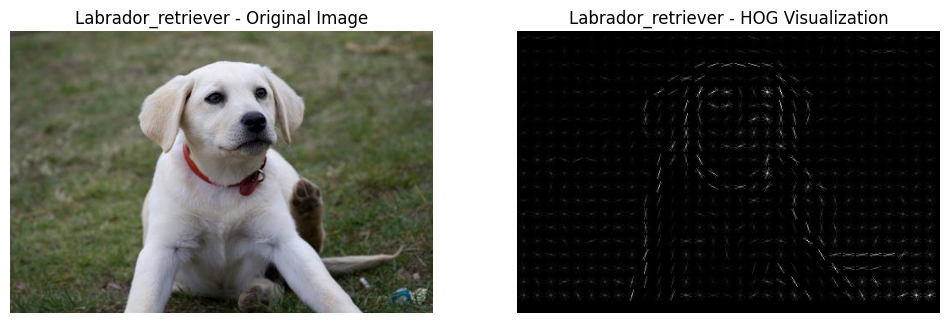

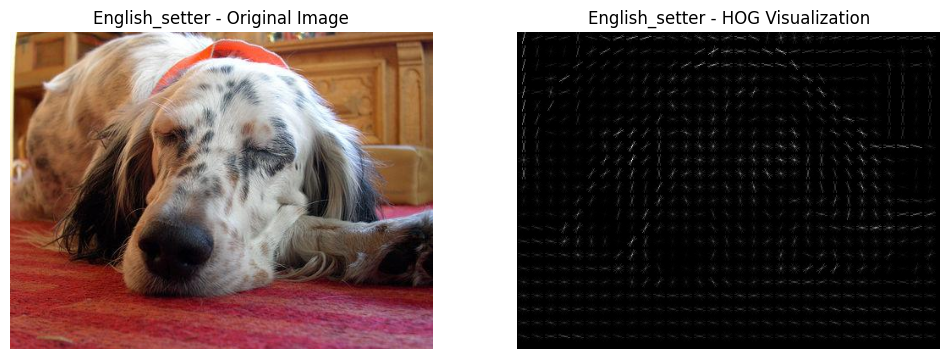

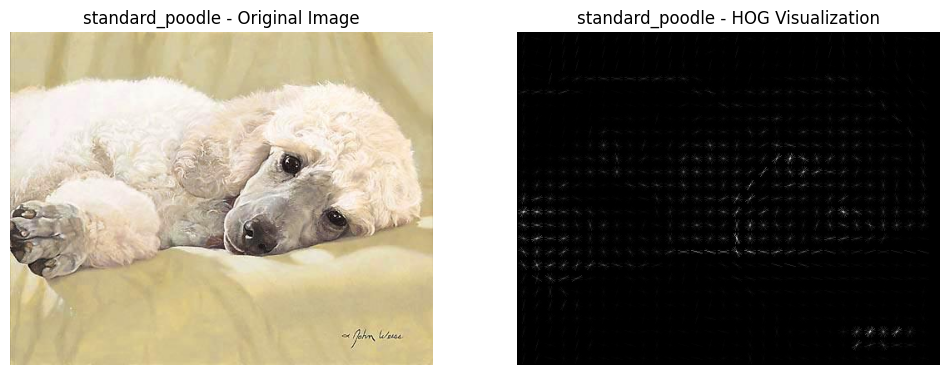

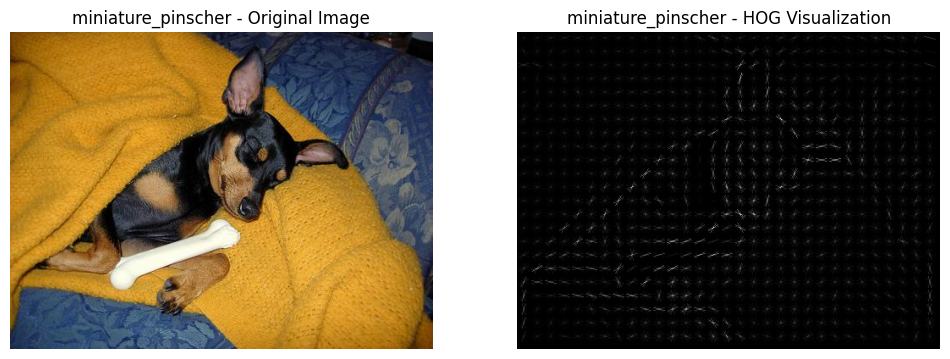

In [18]:
list_of_images = [
    ("n02099712-Labrador_retriever", "n02099712_209.jpg"),
    ("n02100735-English_setter", "n02100735_634.jpg"),
    ("n02113799-standard_poodle", "n02113799_254.jpg"),
    ("n02107312-miniature_pinscher", "n02107312_867.jpg")
]

for category, image_name in list_of_images:
    category_title = category.split("-")[1]   
    image_path = f"images/{category}/{image_name}"
    compute_and_visualize_hog(image_path, category_title)

## 2f: Dimensionality reduction (using Principal Component Analysis, PCA)

+  use images from any two classes
+  convert all images from the two classes to edge histograms
+  perform PCA dimensionally reduction on the set of histograms to reduce from 36 to 2 dimensions
+  Plot the 2D points using 2 different colors for data from the 2 classes

In [19]:
from skimage import io, color, filters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
def generate_edge_hist(img):
    grayscale_img = color.rgb2gray(img)
    dx = filters.sobel_h(grayscale_img)
    dy = filters.sobel_v(grayscale_img)
    angles = np.arctan2(dy, dx)
    hist, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
    return hist

def perform_pca_and_plot(class1_paths, class2_paths):
    histograms = []
    class_labels = []

    for img_path in class1_paths + class2_paths:
        img = io.imread(img_path)
        hist = generate_edge_hist(img)
        histograms.append(hist)
        class_labels.append("Class 1" if img_path in class1_paths else "Class 2")
    
    # convert to numpy array and perform PCA
    histograms_np = np.array(histograms)

    # normalize the data
    scaler = StandardScaler()
    histograms_std = scaler.fit_transform(histograms_np)
    
    pca = PCA(n_components=2)
    histograms_pca = pca.fit_transform(histograms_std)
    
    pca_class1 = histograms_pca[:len(class1_paths)]
    pca_class2 = histograms_pca[len(class1_paths):]

    plt.scatter(pca_class1[:, 0], pca_class1[:, 1], color='red', label="Class 1")
    plt.scatter(pca_class2[:, 0], pca_class2[:, 1], color='blue', label="Class 2")

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Image Edge Histograms')
    plt.legend(['Class 1', 'Class 2'])
    plt.show()

def fetch_all_images_from_folder(class_folder_path):
    return [os.path.join(class_folder_path, img_name)  for img_name in os.listdir(class_folder_path) if img_name.lower().endswith((".jpg", '.png', '.jpeg'))]

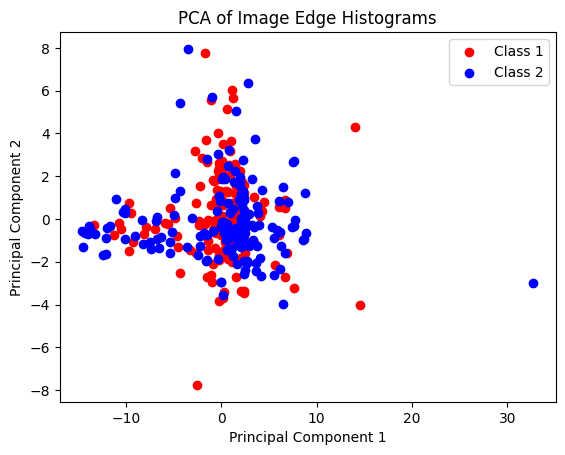

In [21]:
class1_folder_path = "images/n02099712-Labrador_retriever"
class2_folder_path = "images/n02113799-standard_poodle"

list_of_class1_img_path = fetch_all_images_from_folder(class1_folder_path)
list_of_class2_img_path = fetch_all_images_from_folder(class2_folder_path)

perform_pca_and_plot(list_of_class1_img_path, list_of_class2_img_path)